## **Author: Harshit Raj**
### **#Prediction using Supervised ML**


### **Task 1: Predict the percentage of an student based on the no. of study hours.What will be predicted score if a                        student studies for 9.25 hrs/ day?**



In [88]:
# Importing all libraries required for this task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [89]:
# Reading data from remote link
url = 'http://bit.ly/w-data'
dataset = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [90]:
dataset.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [91]:
dataset.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [94]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


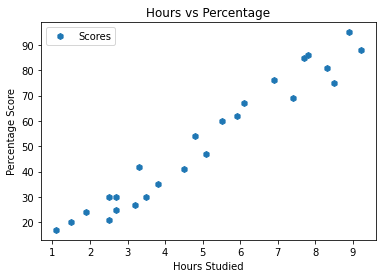

In [95]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='h')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.show()

**As we see, there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

In [86]:
#Divide the data into "attributes" (inputs) and "labels" (outputs).
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values  
print('Shape of X = {} and y= {}'.format(X.shape,y.shape))

Shape of X = (25, 1) and y= (25,)


In [87]:
print('X= {} \n y= {}'.format(X,y))

X= [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] 
 y= [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [73]:
 #Split this data into training and test sets using Scikit-Learn's built-in train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [74]:
algo1 = LinearRegression()  
algo1.fit(X_train, y_train) #fit this train data into linearRegression algorithm

print("Training complete.")

Training complete.


In [75]:
#Coefficient of regression line
m=algo1.coef_
m

array([9.91065648])

In [76]:
#Intercept of regression line
c=algo1.intercept_
c

2.018160041434662

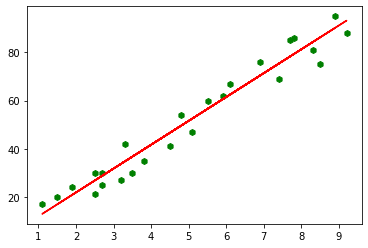

In [77]:
# Plotting the regression line
line = m*X+c
# Plotting for the test data
plt.scatter(X, y,c='green',marker='h')
plt.plot(X, line,'r');
plt.show()

In [78]:
#Take 20% data from dataset for testing purpose

print(X_test) # Testing data - In Hours
y_pred = algo1.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [79]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [80]:
# test with own data
hours = [[9.25]]
own_pred = algo1.predict(hours)
print("If a student studies for {}hrs/day ,then he/she will be scored {}%.".format(hours[0][0],own_pred[0]))

If a student studies for 9.25hrs/day ,then he/she will be scored 93.69173248737539%.


### **Evaluating the model**

In [81]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred)) 
print('Coefficient of Determination(R^2):',metrics.r2_score(y_test, y_pred)) 
print('Max Error:',metrics.max_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Coefficient of Determination(R^2): 0.9454906892105354
Max Error: 6.732260779489835
